## Monte Carlo Simulations 2 (5 years)

In [2]:
# imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
import datetime as dt
from pathlib import Path
from MCForecastTools import MCSimulation
import pylab
from matplotlib import pyplot
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#Read cancatenated CSV file
combined_data = Path("gold_btc.csv")
data = pd.read_csv(combined_data, index_col=0,parse_dates=True, infer_datetime_format=True, header=[0,1])
data

,GLD,BTC
,close,close
2017-05-18,118.8200,1825.549520
2017-05-19,119.4100,1926.201510
2017-05-22,119.8953,2110.906591
2017-05-23,119.1100,2192.909827
2017-05-24,119.6300,2367.351234
...,...,...
2021-03-25,161.8100,52125.759256
2021-03-26,162.2700,53243.124454
2021-03-29,160.3500,56915.629993


## MonteCarlo #1 - Portfolio with 0% GOLD and 100% BTC

In [3]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
mc_1 = MCSimulation(
    portfolio_data = data,
    weights = [0.0,1.0],
    num_simulation = 1000,
    num_trading_days = 252*5
)

mc_1.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.995776,0.979586,0.982555,1.029333,1.040455,1.060793,0.951357,0.994337,0.987631,0.992848,...,0.995662,0.907775,0.998095,0.973062,0.999810,1.029551,0.953128,0.958992,0.991847,0.963730
2,0.987841,1.024773,0.930972,1.099065,1.074144,1.009837,0.976272,0.908543,0.934692,0.991917,...,1.023006,0.926785,0.992630,0.994532,1.025195,1.041813,0.934096,0.995173,0.924481,1.008231
3,1.004466,1.094424,0.933926,1.054605,1.085267,1.011605,0.999185,0.907238,0.911005,0.976910,...,0.993633,0.986946,1.021997,1.051920,1.084818,1.040409,0.950922,0.991438,0.962739,1.037089
4,1.018985,1.091263,0.843187,1.060049,1.127545,0.970397,0.996001,0.896055,0.888363,1.038213,...,1.016805,1.041259,1.103207,1.051638,0.996426,1.102856,1.039207,0.941613,0.979623,1.076631
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,103.447244,458.633450,11.220978,14.401263,19.302050,127.261208,73.716458,102.590046,165.818537,35.872742,...,48.913504,1539.981570,51.574202,1.205035,1572.922215,106.302391,570.484854,200.982942,56.783154,316.730663
1257,112.136841,460.513711,11.388620,14.478809,19.282161,129.162327,76.372177,100.723381,178.100620,38.460467,...,48.948517,1437.234459,51.718658,1.234360,1632.794136,108.716474,563.660390,194.051243,58.608545,351.119162
1258,115.642301,495.875627,12.363970,13.566948,21.693697,141.885633,73.263402,104.876396,186.848762,38.435695,...,49.808243,1477.865826,46.744067,1.184232,1648.053872,110.944985,553.240457,193.955358,55.900633,352.009127
1259,114.744220,518.947642,12.563803,14.096785,22.889525,138.430358,71.896914,99.129325,194.320079,38.500831,...,46.515104,1406.544822,46.579677,1.254011,1675.452378,117.756609,592.488872,190.853060,58.462600,364.435696


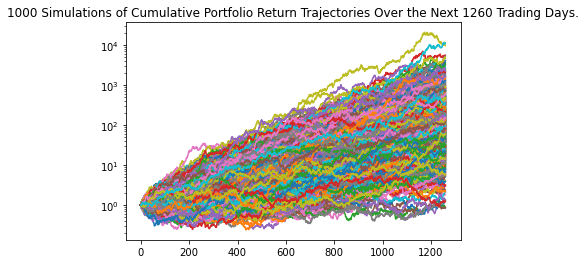

In [4]:
line_plot = mc_1.plot_simulation()
line_plot.set_yscale('log')
fig = line_plot.figure

#Save Figure as PNG for later use
fig.savefig('MC_1.1.png', bbox_inches='tight', pad_inches=0.1)

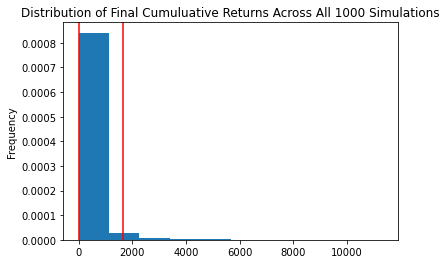

In [5]:
#Plot of probability distribution and confidence intervals
dist_plot_1 = mc_1.plot_distribution()

In [6]:
# Create summary statistics from the Monte Carlo simulation results and print it
mc_1_sts = mc_1.summarize_cumulative_return()
print(mc_1_sts)

count            1000.000000
mean              276.314865
std               692.784087
min                 0.829628
25%                31.581448
50%                90.346417
75%               235.670616
max             11342.988340
95% CI Lower        5.477624
95% CI Upper     1646.600190
Name: 1260, dtype: float64


## MonteCarlo #2 - Portfolio with 25% GOLD and 75% BTC

In [7]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
mc_2 = MCSimulation(
    portfolio_data = data,
    weights = [0.25,0.75],
    num_simulation = 1000,
    num_trading_days = 252*5
)

mc_2.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.030708,1.000904,0.997430,1.020367,0.958213,1.006979,1.037868,0.990980,1.078693,1.003201,...,1.026972,1.033179,0.947449,0.999533,1.014732,0.997686,0.987501,1.013040,1.029199,1.055808
2,1.030953,0.987260,1.032953,1.021786,0.998997,1.013680,1.025287,1.011272,1.101558,1.044183,...,1.029466,1.061012,0.988783,0.959452,1.042536,0.986168,0.966923,1.051156,1.021069,1.081973
3,1.007758,1.009585,1.041158,0.984945,0.974370,1.021554,1.052447,1.020795,1.090550,0.999980,...,1.105894,1.044021,0.961012,0.968175,1.022045,0.996185,0.955141,1.042534,0.970175,1.022445
4,0.942852,0.995569,1.068689,1.029981,0.928785,1.020922,1.067407,1.048256,1.090495,1.047370,...,1.064709,1.032473,0.963793,0.980591,1.029226,1.007634,0.969595,1.030100,1.003722,1.020287
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,33.276094,36.008396,92.801092,87.474553,17.481007,7.951908,35.706924,76.334299,61.028390,15.630811,...,514.328423,96.434243,57.947972,147.544696,50.097417,23.659662,44.990827,280.463895,54.523969,31.665650
1257,35.636800,35.235652,97.392174,91.482832,18.837630,8.315595,34.889571,74.231094,60.229773,16.033810,...,506.838857,96.475563,59.344389,152.357910,49.795349,24.917020,45.734628,271.277362,55.349983,33.753983
1258,36.723303,33.465506,102.819606,86.707593,17.760161,8.406821,34.918127,73.699393,58.558937,15.458743,...,507.146771,92.309632,57.506027,155.737402,50.964260,25.849380,47.225613,276.021077,54.102625,35.009951
1259,39.998829,33.202265,104.768826,86.798041,18.002649,8.129180,34.214632,73.658312,57.248605,15.417885,...,516.094439,94.007728,57.818555,161.770497,50.506567,26.389175,46.339912,274.241575,51.146134,34.348474


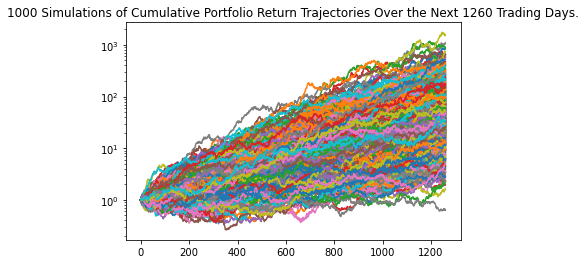

In [8]:
line_plot_2 = mc_2.plot_simulation()
line_plot_2.set_yscale('log')
fig_2 = line_plot_2.figure

#Save Figure as PNG for later use
fig_2.savefig('MC_2.1.png', bbox_inches='tight', pad_inches=0.1)

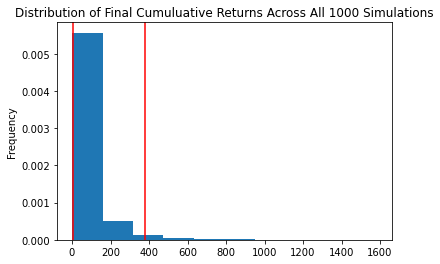

In [9]:
#Plot of probability distribution and confidence intervals
dist_plot_2 = mc_2.plot_distribution()

In [10]:
# Create summary statistics from the Monte Carlo simulation results and print it
mc_2_sts = mc_2.summarize_cumulative_return()
print(mc_2_sts)

count           1000.000000
mean              77.060527
std              115.759783
min                0.636628
25%               19.349468
50%               39.328963
75%               86.508889
max             1581.569893
95% CI Lower       4.273699
95% CI Upper     376.478092
Name: 1260, dtype: float64


## MonteCarlo #3 Portfolio with 50% GOLD and 50% BTC

In [11]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
mc_3 = MCSimulation(
    portfolio_data = data,
    weights = [0.50,0.50],
    num_simulation = 1000,
    num_trading_days = 252*5
)

mc_3.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.020189,1.002644,1.013166,1.003232,1.012511,1.005520,0.979175,1.024761,1.021551,0.994686,...,0.977175,1.028944,0.981537,0.992945,1.025096,0.986695,0.997970,1.031702,1.009083,1.014472
2,1.023318,0.949697,0.993811,1.017124,1.024332,1.020491,0.990146,0.951181,1.019108,0.973812,...,0.996964,1.025798,0.954561,1.000294,1.016603,1.034527,0.998984,1.057588,1.023491,1.015774
3,1.052931,0.947873,0.993841,0.992235,1.020260,0.987641,0.992424,0.917551,1.022197,0.994022,...,1.036309,1.054676,0.926386,1.011724,1.015971,1.020725,0.995470,1.087586,1.019698,1.030973
4,1.060626,0.949079,1.004340,1.054529,1.006226,0.982304,0.992150,0.904925,1.056506,1.010611,...,1.053062,1.087755,0.918504,1.033511,0.991658,1.057426,0.983071,1.074848,1.028034,1.027828
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,19.196974,20.188115,30.926827,10.029212,5.838386,40.411346,10.192980,11.810769,9.472192,16.409846,...,72.844275,16.205834,33.214274,5.826558,8.481466,20.515866,18.476082,10.901004,10.814969,9.581781
1257,18.903565,20.199473,31.347544,9.855470,6.099617,38.160695,10.079352,12.174075,9.378251,16.612575,...,73.390408,15.662602,32.712819,5.868333,8.261211,20.348780,18.672320,11.082169,11.037950,9.877795
1258,18.652790,20.072952,32.728733,9.686907,6.383023,38.711686,10.224737,11.816458,8.873754,16.483008,...,75.787052,15.606224,32.599502,5.953068,8.198565,20.589613,18.583631,11.120393,11.221834,9.705526
1259,17.986892,20.752462,33.005245,9.827164,6.293929,39.047615,9.982701,11.598776,8.717200,16.659877,...,74.387578,16.016887,32.802243,5.924056,8.517379,21.228448,18.927235,11.102803,11.216755,9.643437


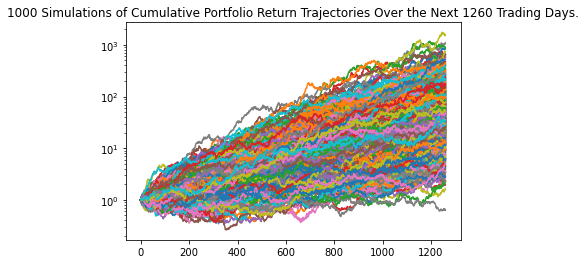

In [12]:
line_plot_3 = mc_2.plot_simulation()
line_plot_3.set_yscale('log')
fig_3 = line_plot_3.figure

#Save Figure as PNG for later use
fig_3.savefig('MC_3.1.png', bbox_inches='tight', pad_inches=0.1)

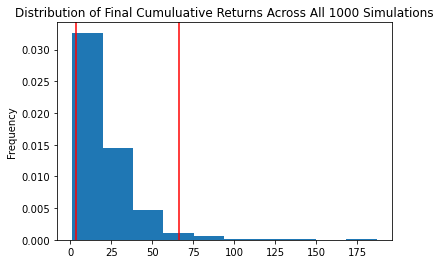

In [13]:
#Plot of probability distribution and confidence intervals
dist_plot_3 = mc_3.plot_distribution()

In [14]:
# Create summary statistics from the Monte Carlo simulation results and print it
mc_3_sts = mc_3.summarize_cumulative_return()
print(mc_3_sts)

count           1000.000000
mean              21.147014
std               17.981776
min                1.055224
25%                9.904309
50%               16.000340
75%               27.035521
max              186.884852
95% CI Lower       3.525919
95% CI Upper      66.484027
Name: 1260, dtype: float64


## MonteCarlo #4 - Portfolio with 75% GOLD and 25% BTC

In [15]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
mc_4 = MCSimulation(
    portfolio_data = data,
    weights = [0.75,0.25],
    num_simulation = 1000,
    num_trading_days = 252*5
)

mc_4.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.004839,0.982280,1.008728,0.999597,0.995859,1.009152,1.000512,1.001915,1.004083,1.016483,...,1.001915,1.019822,1.008087,0.980267,0.975284,0.988778,1.009570,1.018824,1.008872,0.997885
2,0.985358,0.982792,1.019696,1.013358,1.008396,1.014314,0.998848,0.999520,1.027403,1.030112,...,1.004067,1.011786,1.024501,0.980903,1.000168,0.967800,1.005882,1.014750,1.009253,1.001509
3,0.977646,1.002907,1.019889,1.028944,1.017854,1.035427,1.011303,1.009399,1.031114,1.033653,...,1.024109,1.000649,1.017800,0.974077,0.992089,0.973831,0.976927,0.996945,1.005620,0.996425
4,0.955134,1.022261,1.012155,1.052414,1.005834,1.058555,1.005279,1.010039,1.021816,1.022283,...,1.027413,0.988079,1.000112,0.979979,1.003725,1.005695,0.969086,1.006646,1.013485,0.991953
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,3.572561,5.197030,7.464378,5.026759,9.080076,9.532613,5.030309,5.986549,4.977395,11.533820,...,9.714275,5.059908,4.950259,12.715401,2.147554,7.396849,8.882444,6.350528,4.367931,4.102545
1257,3.521675,5.199186,7.454476,4.941067,9.038202,9.733501,5.036506,5.947366,4.997562,11.768681,...,9.859826,5.035561,4.942652,12.864920,2.142121,7.278988,8.841790,6.260391,4.314410,4.089545
1258,3.527085,5.313895,7.391267,4.955166,8.919059,9.644987,5.081715,6.019885,5.000925,11.617178,...,9.895842,5.018160,4.911993,12.820975,2.186915,7.186032,8.753820,6.221553,4.287028,4.129705
1259,3.496035,5.329874,7.542387,4.925181,9.003506,9.755184,5.109712,5.987544,4.960961,11.782467,...,9.907309,4.996113,4.933862,12.887769,2.199440,7.187981,8.671268,6.282017,4.350567,4.140528


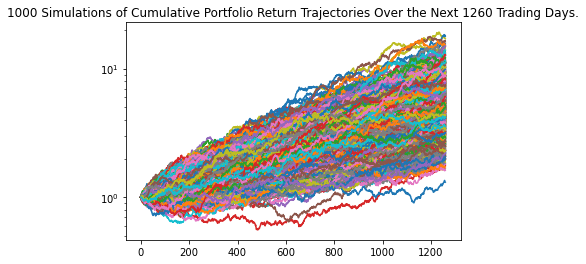

In [16]:
line_plot_4 = mc_4.plot_simulation()
line_plot_4.set_yscale('log')
fig_4 = line_plot_4.figure

#Save Figure as PNG for later use
fig_4.savefig('MC_4.1.png', bbox_inches='tight', pad_inches=0.1)

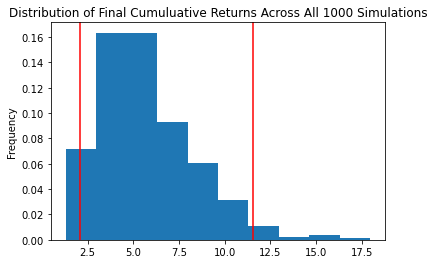

In [17]:
#Plot of probability distribution and confidence intervals
dist_plot_4 = mc_4.plot_distribution()

In [18]:
# Create summary statistics from the Monte Carlo simulation results and print it
mc_4_sts = mc_4.summarize_cumulative_return()
print(mc_4_sts)

count           1000.000000
mean               5.715103
std                2.592796
min                1.310351
25%                3.867019
50%                5.158938
75%                7.129309
max               17.961119
95% CI Lower       2.094393
95% CI Upper      11.530721
Name: 1260, dtype: float64


## MonteCarlo #5 - Portfolio with 100% GOLD and 0% BTC

In [19]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
mc_5 = MCSimulation(
    portfolio_data = data,
    weights = [1.00,0.00],
    num_simulation = 1000,
    num_trading_days = 252*5
)

mc_5.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.992395,1.016391,1.004451,0.999304,0.994571,1.002784,0.995691,1.011799,0.998476,0.998728,...,0.987689,0.999067,1.006709,1.005143,1.003585,1.013929,0.995214,1.005962,0.999444,1.011449
2,0.975294,1.021704,0.999715,0.994245,0.994644,1.001854,1.006867,1.025321,0.999643,0.993367,...,0.981335,1.009580,1.003718,1.006029,0.996461,1.009194,0.985320,1.012169,1.006032,1.016361
3,0.968849,1.032296,0.991827,0.999910,0.990749,1.003212,1.011176,1.024697,1.002191,0.965165,...,0.976051,1.011167,1.000996,1.011686,0.996171,1.018233,0.996939,1.013580,1.009316,1.015333
4,0.952056,1.031028,0.997019,1.006579,0.995636,1.015543,1.011420,1.039469,1.001151,0.964139,...,0.975856,1.004442,0.996883,1.012595,0.990746,1.013654,0.992220,1.014633,1.004307,1.009526
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,1.754191,1.493379,2.015709,0.995252,2.376381,1.046613,2.267631,1.558038,3.130616,1.621549,...,1.675477,0.969814,1.585301,1.736825,1.179055,1.843732,1.302242,1.568485,1.505006,1.357202
1257,1.767012,1.486718,2.006719,1.004328,2.384640,1.052894,2.228864,1.556870,3.173231,1.620725,...,1.661719,0.982708,1.582400,1.747924,1.168097,1.826879,1.317173,1.563641,1.515291,1.350559
1258,1.753388,1.483674,2.004416,1.005781,2.399164,1.048470,2.216328,1.559196,3.217691,1.633978,...,1.648457,0.989302,1.603669,1.753846,1.157310,1.839574,1.327162,1.540092,1.517363,1.333772
1259,1.732548,1.486038,1.993971,1.004346,2.430990,1.043160,2.227325,1.574919,3.208342,1.607092,...,1.652881,0.984798,1.616637,1.740752,1.155683,1.817165,1.332770,1.552109,1.524100,1.335744


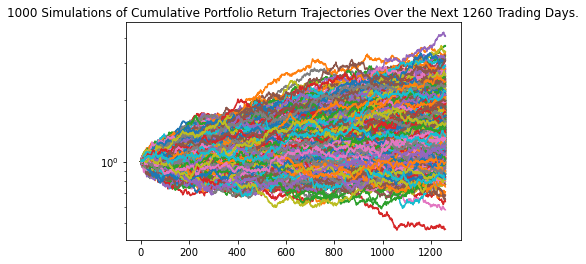

In [20]:
line_plot_5 = mc_5.plot_simulation()
line_plot_5.set_yscale('log')
fig_5 = line_plot_5.figure

#Save Figure as PNG for later use
fig_5.savefig('MC_5.1.png', bbox_inches='tight', pad_inches=0.1)

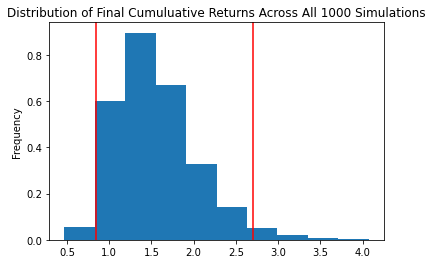

In [21]:
#Plot of probability distribution and confidence intervals
dist_plot_5 = mc_5.plot_distribution()

In [22]:
# Create summary statistics from the Monte Carlo simulation results and print it
mc_5_sts = mc_5.summarize_cumulative_return()
print(mc_5_sts)

count           1000.000000
mean               1.550763
std                0.482185
min                0.468780
25%                1.203600
50%                1.462364
75%                1.811335
max                4.071301
95% CI Lower       0.847703
95% CI Upper       2.706475
Name: 1260, dtype: float64
